In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import arcadia_pycolor as apc
from pathlib import Path
import numpy as np

apc.mpl_setup()

In [39]:
output_path = Path('../output/')
combined_data = output_path / 'combined_data.tsv'

combined_data_df = pd.read_csv(combined_data, sep = '\t')
display(combined_data_df)

/var/folders/5b/71_5djmd0p5_yhs0tpbbq68r0000gn/T/ipykernel_91312/3994468543.py:4: DtypeWarning: Columns (0,3,4,5,7,9,10,11,12,14,15,18,19,20,21,23,24,25,26,27,28,29,30,44,45,56,57,58,59,60,63) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_data_df = pd.read_csv(combined_data, sep = '\t')


,protid,UMAP1,UMAP2,StruCluster,LeidenCluster,pdb_origin,pdb_confidence,pdb_chains,TMscore_v_P60709,Entry,...,best_domain_bis,domain_number_exp,domain_number_reg,domain_number_clu,domain_number_ov,domain_number_env,domain_number_dom,domain_number_rep,domain_number_inc,description
0,A0A010QW85,5.711124,-0.868634,SC31,LC10,AlphaFold,69.878344,['A'],0.0,A0A010QW85,...,0.0,1.1,1.0,0.0,0.0,1.0,1.0,1.0,1.0,Actin
1,A0A010RHW1,6.842225,-5.490983,SC39,LC15,AlphaFold,90.340917,['A'],0.0,A0A010RHW1,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,Actin
2,A0A010SEV7,15.114400,-1.790521,SC22,LC21,AlphaFold,88.601931,['A'],0.0,A0A010SEV7,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,Actin
3,A0A015ICG5,-4.460266,13.477738,SC10,LC14,AlphaFold,87.167435,['A'],0.0,A0A015ICG5,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,Actin
4,A0A015J9J4,0.146874,1.547979,SC10,LC14,AlphaFold,87.762448,['A'],0.0,A0A015J9J4,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,Actin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52545,Q8I8C3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,Actin
52546,X6LKS7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,Actin
52547,H7CD47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,Actin
52548,A0A7G5CEI4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,Actin


In [76]:
list_cols = ['pdb_confidence', 'Length', 'avg_fid', 'lon_fraction_matching', 'lat_fraction_matching', 'atp_fraction_matching', "w_avg_contacts"]

agg_lambda_func = {col: (list if col in list_cols else 'first') for col in combined_data_df.columns }

grouped = combined_data_df.groupby('LeidenCluster').agg(list)

In [77]:
distribution_dict = {}

def sanitize_nested_list(nested_list):
    sanitized_list = []  # Step 1: Initialize an empty list
    for item in nested_list:  # Step 2: Iterate through the given list
        if isinstance(item, list):  # Step 3: Check if the item is a list
            sanitized_sublist = sanitize_nested_list(item)  # Recursive call
            sanitized_list.append(sanitized_sublist)
        elif not pd.isna(item):  # Check if the item is 'NA' or 'na'
            sanitized_list.append(item)  # Append item to the sanitized list
    return sanitized_list  # Step 4: Return the sanitized list

for col in list_cols:
    distribution_dict[col] = dict(grouped[col])
    for item in distribution_dict[col]:
        distribution_dict[col][item] = sanitize_nested_list(distribution_dict[col][item])

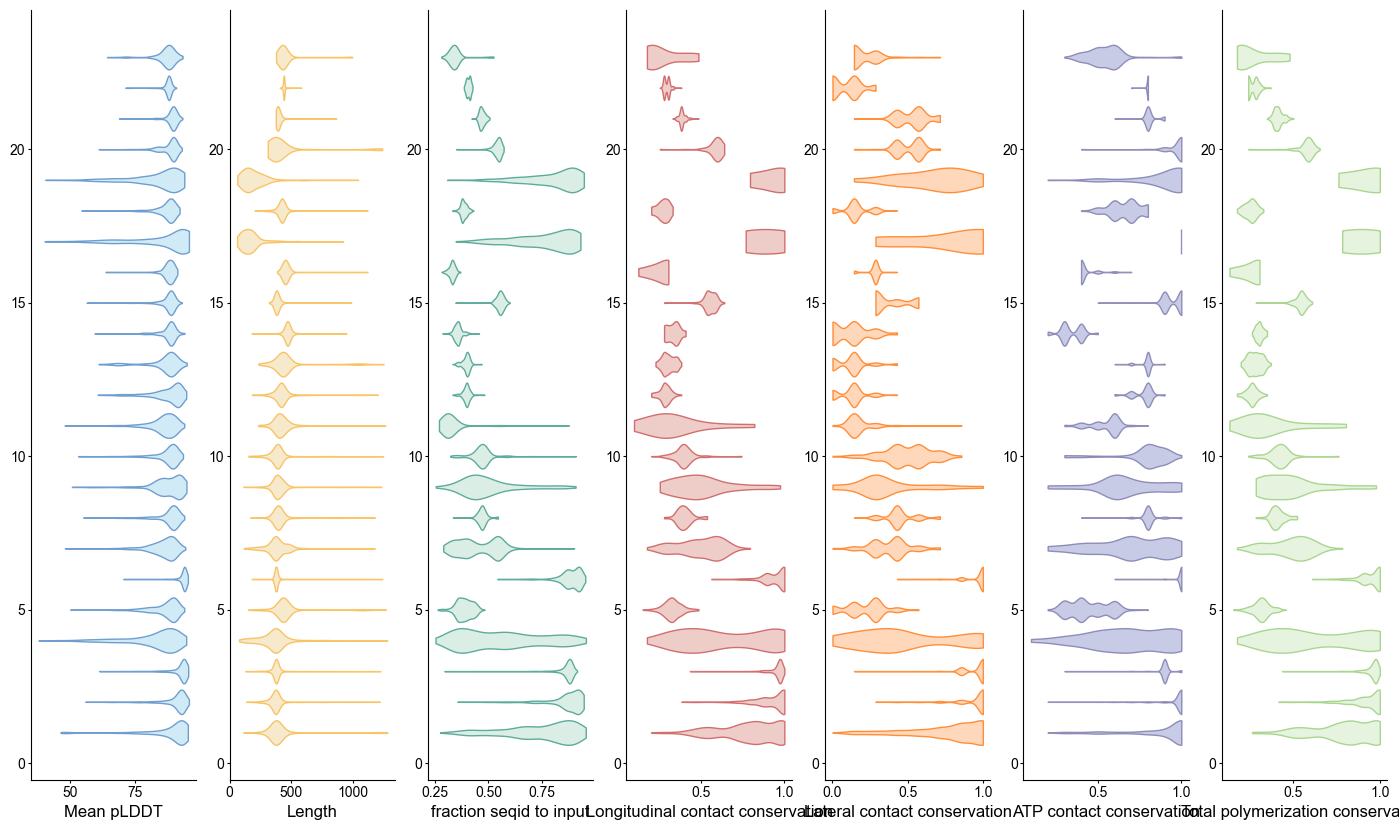

In [87]:
plotting_rules = {
    'Length': {
        'textlabel': 'Length',
        'facecolor': apc.All['arcadia:oat'],
        'edgecolor': apc.All['arcadia:canary']
    },
    'pdb_confidence': {
        'textlabel': 'Mean pLDDT',
        'facecolor': apc.All['arcadia:bluesky'],
        'edgecolor': apc.All['arcadia:aegean']
    }, 
    'avg_fid': {
        'textlabel': 'fraction seqid to input',
        'facecolor': apc.All['arcadia:mint'],
        'edgecolor': apc.All['arcadia:seaweed']
    }, 
    'lon_fraction_matching': {
        'textlabel': 'Longitudinal contact conservation',
        'facecolor': apc.adjust_lightness(apc.All['arcadia:mars'], 1.2),
        'edgecolor': apc.All['arcadia:dragon']
    }, 
    'lat_fraction_matching': {
        'textlabel': 'Lateral contact conservation',
        'facecolor': apc.adjust_lightness(apc.All['arcadia:tangerine'], 1.1),
        'edgecolor': apc.adjust_lightness(apc.All['arcadia:tangerine'], 0.7)
    }, 
    'atp_fraction_matching': {
        'textlabel': 'ATP contact conservation',
        'facecolor': apc.All['arcadia:wish'],
        'edgecolor': apc.All['arcadia:aster']
    },
    "w_avg_contacts": {
        "textlabel": "Total polymerization conservation",
        'facecolor': apc.adjust_lightness(apc.All['arcadia:lime'], 1.4),
        'edgecolor': apc.All['arcadia:lime']
    },
}

fig, axs = plt.subplots(nrows = 1, ncols = len(list_cols), figsize = (2.5 * len(list_cols), 10))

for i, ax in enumerate(axs):
    col = list_cols[i]
    parts = ax.violinplot(distribution_dict[col].values(), vert = False, showextrema = False, widths = 0.8)
    for pc in parts['bodies']:
        pc.set_facecolor(plotting_rules[col]['facecolor'])
        pc.set_edgecolor(plotting_rules[col]['edgecolor'])
        pc.set_linewidths(1)
        pc.set_alpha(0.8)
    ax.set_xlabel(plotting_rules[col]['textlabel'])
    